__01. Import Libraries__

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [10]:
# Display graphs without need to call
%matplotlib inline

In [11]:
#creating path
path = r'/Users/rayruslijunior/04-2022 Munich Airbnb Data Analysis'

In [12]:
#import data
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','munich_clean2.csv'))

In [13]:
df.head()

,Unnamed: 0,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_category,rental_term,host_type
0,0,Hadern,48.11492,11.48954,Entire home/apt,80.0,2,129,2,22,0,Middle price,Short term,Private host
1,1,Berg am Laim,48.12071,11.63758,Entire home/apt,95.0,2,53,2,52,0,Middle price,Short term,Private host
2,2,Maxvorstadt,48.15199,11.56482,Entire home/apt,99.0,3,101,1,4,8,Middle price,Short term,Private host
3,3,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,52.0,3,34,1,0,0,Low price,Short term,Private host
4,4,Sendling-Westpark,48.10814,11.52733,Private room,55.0,2,496,1,162,18,Low price,Medium term,Private host


In [14]:
# Drop Unnamed
df = df.drop(columns = ['Unnamed: 0'])

In [15]:
df.shape

(4995, 13)

__02. Wrangling and Cleaning__

In [16]:
df.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'price_category',
       'rental_term', 'host_type'],
      dtype='object')

In [17]:
#keep only non categorical columns for k-means clustering
columns = ["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]

In [18]:
df = df[columns]

In [19]:
df.head(5)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,80.0,2,129,2,22
1,95.0,2,53,2,52
2,99.0,3,101,1,4
3,52.0,3,34,1,0
4,55.0,2,496,1,162


In [20]:
# Check for missings
df.isnull().sum()

price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [21]:
# Check dups
dups = df.duplicated()

In [22]:
dups.shape

(4995,)

In [23]:
# Check summary stats
df.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,118.425288,9.006807,22.338138,2.559159,135.479680
std,220.480379,31.415472,55.676039,4.541520,136.233306
min,9.000000,1.000000,0.000000,1.000000,0.000000
25%,55.000000,1.000000,1.000000,1.000000,0.000000
50%,81.000000,2.000000,4.000000,1.000000,88.000000
75%,125.000000,5.000000,17.000000,2.000000,268.000000
max,8000.000000,1000.000000,765.000000,33.000000,365.000000


In [24]:
# Check for mixed data type columns
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
    #none

In [25]:
# Check data types
df.dtypes

price                             float64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

__03. Elbow Techniques__

In [26]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [27]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

[-355964776.66420233,
 -203053826.09928203,
 -124777690.8866358,
 -92255096.61234964,
 -70047653.47479999,
 -60250036.53271119,
 -51374104.36980905,
 -43265652.74371678,
 -38558037.437241256]

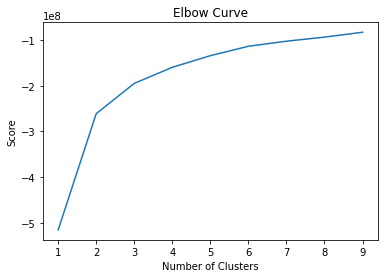

In [25]:
# Plot this curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal number for cluster is 3

__04.K-means clustering__

In [28]:
# Create k-means object
kmeans = KMeans(n_clusters = 3)

In [29]:
# Fit it to data
kmeans.fit(df)

KMeans(n_clusters=3)

In [35]:
# Check clusters in df
df['clusters'] = kmeans.fit_predict(df)

In [36]:
df.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,clusters
0,80.0,2,129,2,22,0
1,95.0,2,53,2,52,0
2,99.0,3,101,1,4,0
3,52.0,3,34,1,0,0
4,55.0,2,496,1,162,0


In [37]:
# Check the cluster counts
df['clusters'].value_counts()

0    3353
2    1636
1       6
Name: clusters, dtype: int64

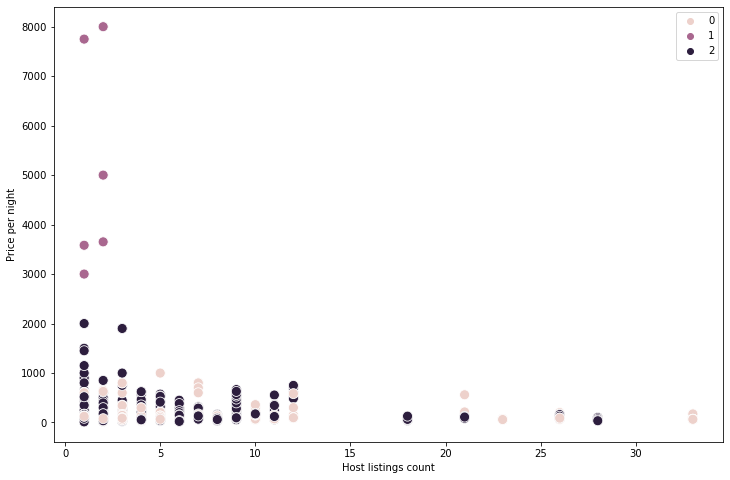

In [38]:
# Plot clusters for price and host listings count variables 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['calculated_host_listings_count'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Host listings count') 
plt.ylabel('Price per night')
plt.show()

Price seem to be the main differences between the cluster.

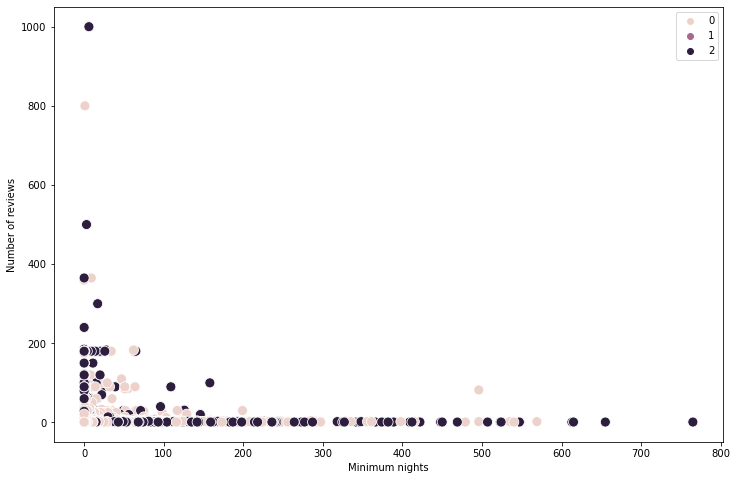

In [39]:
# Plot clusters for minimum_nights and number_of_reviews variables 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['number_of_reviews'], y=df['minimum_nights'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Minimum nights')
plt.ylabel('Number of reviews')
plt.show()

Both of the variables doesnt play a role in our clustering.

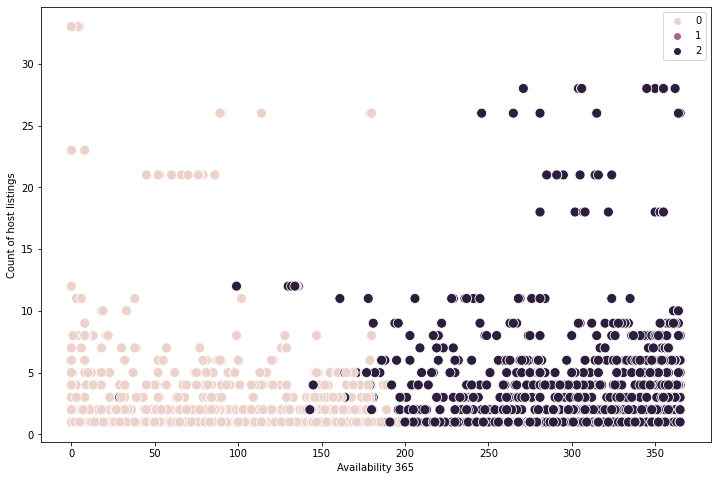

In [40]:
# Plot clusters for availability and host listings count 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['availability_365'], y=df['calculated_host_listings_count'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Availability 365') 
plt.ylabel('Count of host listings')
plt.show()

availability plays a role for differentiating between cluster 0 and 1, cluster 0 has lower availability (until 130) and cluster 1 has more availability and so does cluster 2.

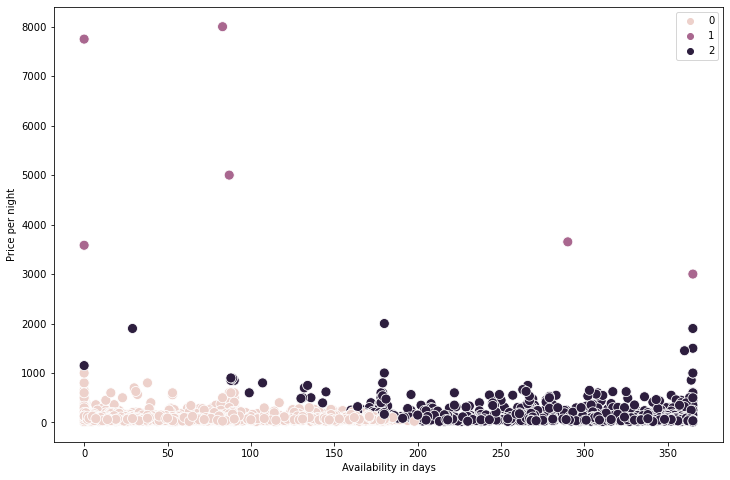

In [43]:
# Plot clusters for price and availability variables 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['availability_365'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Availability in days')
plt.ylabel('Price per night')
plt.show()

Cluster 2 seem to be the cluster with the highest price per night (price based) however availability in days seem to be not the deciding factor for this cluster.

Cluster 1 are mostly accomodation that are available for longer term (from over 100 days upwards)

Cluster 0 are mostly accomodation that are available for shorter term (until 150 days).

__05. Descriptive Statistics of Clusters__

In [42]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [37]:
df['cluster'].value_counts(dropna=False)

pink           3352
dark purple    1637
purple            6
Name: cluster, dtype: int64

In [44]:
# Check descriptive statistics of different clusters 
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'minimum_nights':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                        'calculated_host_listings_count':['mean', 'median'],
                          'availability_365':['mean', 'median']})

price         minimum_nights        number_of_reviews  \
                    mean  median           mean median              mean   
cluster                                                                    
dark purple   144.865559    99.0      12.596577    2.0         28.816015   
pink           96.496349    78.0       7.268118    2.0         19.167909   
purple       5163.666667  4325.5       1.833333    2.0         27.666667   

                   calculated_host_listings_count        availability_365  \
            median                           mean median             mean   
cluster                                                                     
dark purple    4.0                       3.459046    1.0       311.669927   
pink           4.0                       2.121980    1.0        49.509096   
purple         2.0                       1.500000    1.5       137.500000   

                    
            median  
cluster             
dark purple  337.0  
pink          23.0  
purple        85.0

From the descriptive statistics we could get some insight:

- Cluster dark purple: Average Price of 144,86 (Medium Price Range), minimum nights median to book 12,59 nights, has the highest number of review , available mostly all years round and the host in this segment owns on average 3.4 listings.

- Cluster pink: offers the lowest price (mean 96,48 and median 78 ), minimum nights means of 7,2 nights, 19,17 review on average and has a mean availability of 49 nights/year

- Cluster Purpe: has on average the highest accomodation price, and could be book for less than 2 nights (very short term rental), has however more review than cluster pink, on average this host owns 1.5 listing. Available mean 137 days a year.


In [46]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data','Munich_clean3.csv'))